In [1]:
import sys
sys.path.append("../")

In [2]:
from delay.delay import *
import delay.calculator as calc
from delay.strategy import fA_HardInterval, fB_HardInterval, showIntervalFunctions
from delay.simulation import Simulation, FunctionType
from delay.regression import linearRegression, Dependence, whereSmallerOrEqual
from delay.value import calculateValue
import pandas as pd

In [3]:
filePrefix = 'lin-step'

In [4]:
%%writefile csvFilename.py
def createCSVFilename(filePrefix):
    csvFilename = {}
    for ns in ['N=20', 'N=100', 'N=300', 'N=500']:
        tausValue = {}
        for d in [1, 2, 3, 20, 50, 150]:
            tausValue['d='+str(d)] = '../csv/'+ns+'/'+filePrefix+'-taus-d-'+str(d)+'.csv'
        
        dsValue = {}
        for tau in [1, 2, 3, 4,5,6, 20, 50]:
            dsValue['tau='+str(tau)] = '../csv/'+ns + '/' + filePrefix + '-ds-tau-' + str(tau)+'.csv'
        
        csvFilename[ns] = {'ds': dsValue,
                          'taus': tausValue}
    return csvFilename

Overwriting csvFilename.py


In [5]:
%run csvFilename.py
csvFilename = createCSVFilename(filePrefix)
csvFilename

{'N=20': {'ds': {'tau=1': '../csv/N=20/lin-step-ds-tau-1.csv',
   'tau=2': '../csv/N=20/lin-step-ds-tau-2.csv',
   'tau=3': '../csv/N=20/lin-step-ds-tau-3.csv',
   'tau=4': '../csv/N=20/lin-step-ds-tau-4.csv',
   'tau=5': '../csv/N=20/lin-step-ds-tau-5.csv',
   'tau=6': '../csv/N=20/lin-step-ds-tau-6.csv',
   'tau=20': '../csv/N=20/lin-step-ds-tau-20.csv',
   'tau=50': '../csv/N=20/lin-step-ds-tau-50.csv'},
  'taus': {'d=1': '../csv/N=20/lin-step-taus-d-1.csv',
   'd=2': '../csv/N=20/lin-step-taus-d-2.csv',
   'd=3': '../csv/N=20/lin-step-taus-d-3.csv',
   'd=20': '../csv/N=20/lin-step-taus-d-20.csv',
   'd=50': '../csv/N=20/lin-step-taus-d-50.csv',
   'd=150': '../csv/N=20/lin-step-taus-d-150.csv'}},
 'N=100': {'ds': {'tau=1': '../csv/N=100/lin-step-ds-tau-1.csv',
   'tau=2': '../csv/N=100/lin-step-ds-tau-2.csv',
   'tau=3': '../csv/N=100/lin-step-ds-tau-3.csv',
   'tau=4': '../csv/N=100/lin-step-ds-tau-4.csv',
   'tau=5': '../csv/N=100/lin-step-ds-tau-5.csv',
   'tau=6': '../csv/N=10

In [17]:
simulation = Simulation(FunctionType.HARD_INTERVAL, (0, 0), calculateValue, calc.linear(N=100, w=0.99))
simulation.setN(100)
simulation.setConv(100)
simulation.setDuration(100000000) # 10^8
simulation.setD(20)

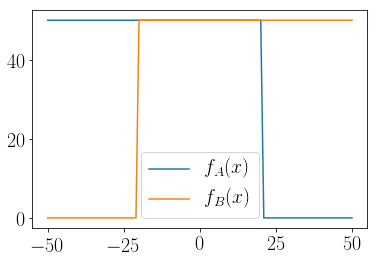

In [18]:
N = 100
showIntervalFunctions(fA_HardInterval, fB_HardInterval, N, d=20)

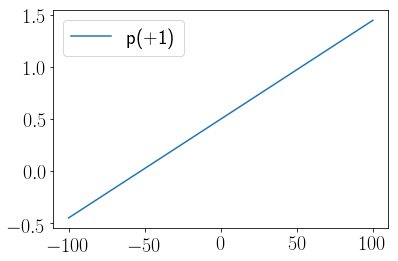

In [19]:
calc.plot(calc.linear(N=100))

µ =  0.011200909978988798


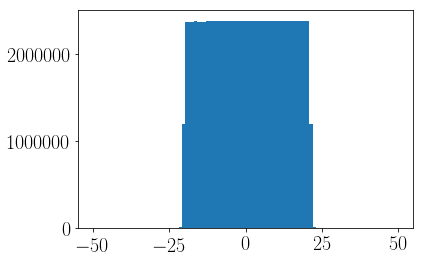

In [20]:
simulation.setTau((0, 0))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram0')

µ =  -3.0319970529859175


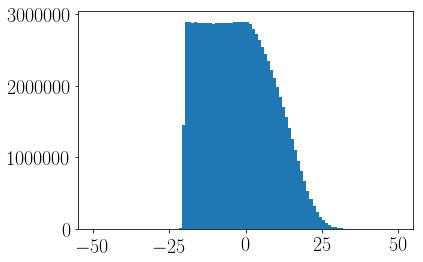

In [21]:
simulation.setTau((20, 0))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram-tauA')

µ =  3.025461800833105


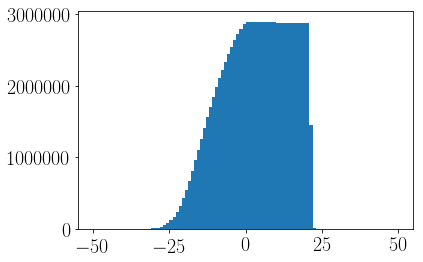

In [22]:
simulation.setTau((0, 20))
simulation.run()
simulation.plotOnlyHistogram('../../../draft/img/results/'+filePrefix+'/histogram-tauB')

In [23]:
simulation.setIterations(10)

In [24]:
taus, mus = [], [] 
simulation.setD(20)

print('d, τ, µ')
for i in range(0, 35):
    tauA = i * 2
    simulation.setTau((tauA, 0))
    simulation.run()
    simulation.systematicInfo()
    taus.append(tauA)
    mus.append(simulation.getAverage())

steps = len(taus)
data = {'d': [20]*steps, 'τ': taus, 'µ': mus}
df = pd.DataFrame(data = data)
df.to_csv(csvFilename['taus']);

d, τ, µ
20 ,  0 ,  -0.0853740857010884
20 ,  2 ,  -0.2802610948990461
20 ,  4 ,  -0.6530226930879472
20 ,  6 ,  -0.9225289590935927
20 ,  8 ,  -1.2809600579097853
20 ,  10 ,  -1.559656338475087
20 ,  12 ,  -1.9158340451877525
20 ,  14 ,  -2.2079720639308626
20 ,  16 ,  -2.510581336228982
20 ,  18 ,  -2.7756901338753606
20 ,  20 ,  -3.048974656691245
20 ,  22 ,  -3.3043913660826805
20 ,  24 ,  -3.5524127276454553
20 ,  26 ,  -3.789376516626238
20 ,  28 ,  -3.9994845386084994
20 ,  30 ,  -4.183923253469906
20 ,  32 ,  -4.325075807054931
20 ,  34 ,  -4.502038443110472
20 ,  36 ,  -4.623489241998288
20 ,  38 ,  -4.730533981184526
20 ,  40 ,  -4.811646333741914
20 ,  42 ,  -4.848674454028643
20 ,  44 ,  -4.863614954232545
20 ,  46 ,  -4.920634961591378
20 ,  48 ,  -4.9179094219874875
20 ,  50 ,  -4.928367684017206
20 ,  52 ,  -4.953494424555466
20 ,  54 ,  -4.967622320363537
20 ,  56 ,  -4.96845896419022
20 ,  58 ,  -5.009507055001267
20 ,  60 ,  -4.967226022922158
20 ,  62 ,  -4.9718184398

Mean squared error: 0.16
Variance score: 0.94
Line: -0.10x + -0.621345


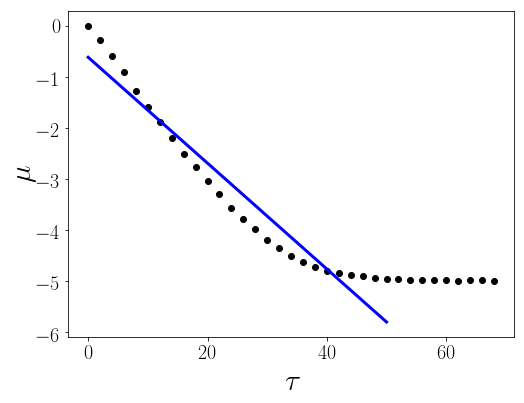

In [25]:
df = pd.read_csv(csvFilename['taus'], sep=',')
toDict = df.to_dict('l')
taus = toDict['τ']
mus = toDict['µ']

linearRegression(taus, mus, Dependence.TAU, '../../../draft/img/results/'+filePrefix+'/tau-d50', forHalfN=True, N=100);

In [26]:
ds, mus = [], []
simulation.setTau((50, 0))

print('d, τ, µ')
_ = np.arange(0, 48, step=2)
_ = np.union1d(_, np.arange(47, 51))
_ = np.union1d(_, np.arange(52, 72, step=2))
for d in _:
    simulation.setD(d)
    simulation.run()
    simulation.systematicInfo()
    ds.append(d)
    mus.append(simulation.getAverage())
    
steps = len(ds)
data = {'d': ds, 'τ': [50]*steps, 'µ': mus}
df = pd.DataFrame(data = data)
df.to_csv(csvFilename['ds']);

d, τ, µ


KeyboardInterrupt: 

Mean squared error: 0.32
Variance score (R^2): 0.73
Line: -0.08d + -0.966617


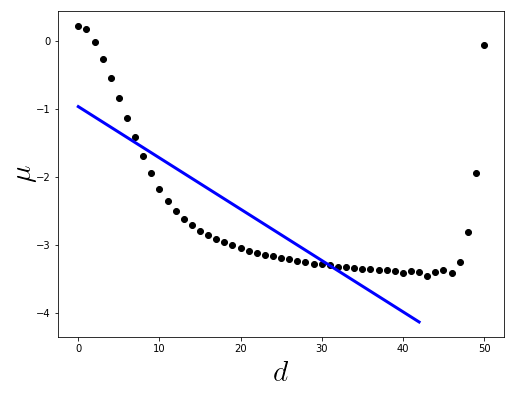

In [24]:
df = pd.read_csv('../../csv/N=100/lin-step-ds-tau-20.csv', sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']
# slais = whereSmallerOrEqual(ds, 50)
# ds, mus = ds[slais], mus[slais]

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/N=100/d-tau20', forHalfN=True, N=100);

In [23]:
print(csvFilename['N=100']['ds']['tau=20'])
print(filePrefix)
os.getcwd()

../../csv/N=100/lin-step-ds-tau20.csv
lin-step


'/home/kamil/Documents/bioinformatyka/grant/simulations/systematycznie/show2'

In [22]:
df = pd.read_csv(csvFilename['N=300']['ds']['tau=20'], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/N=300/d-tau20', forHalfN=True, N=100);

FileNotFoundError: [Errno 2] File b'/home/kamil/Documents/bioinformatyka/grant/simulations/csv/N=300/lin-step-ds-tau-20.csv' does not exist: b'/home/kamil/Documents/bioinformatyka/grant/simulations/csv/N=300/lin-step-ds-tau-20.csv'

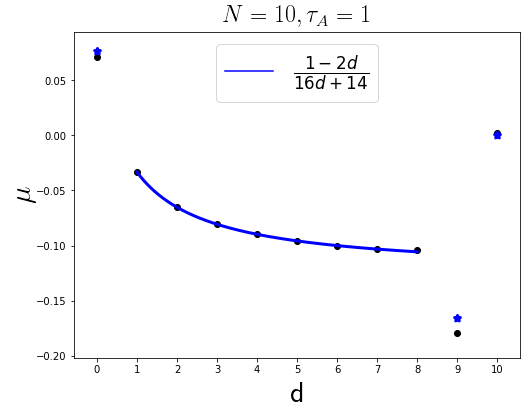

In [27]:
import matplotlib.lines as mlines

df = pd.read_csv('../csv/deterministic/N=20/lin-step-ds-tau-1.csv', sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

plt.figure(figsize=(8,6))
plt.xticks(np.arange(0, 11))

plt.scatter(ds, mus, color='black')

x = np.linspace(1, 8, num=1000)
y = (1-2*x)/(16*x+14)
plt.plot(x, y, color='blue', linewidth=3)

pointMarker = '*'
plt.scatter(0, 1/13, color='blue', linewidth=3, marker=pointMarker)
plt.scatter(9, (lambda d: (1-3*d)/(16*d + 13)) (9), color='blue', linewidth=3, marker=pointMarker)
plt.scatter(10, 0, color='blue', linewidth=3, marker=pointMarker)

blue_line = mlines.Line2D([], [], color='blue', label=r'$\frac{1-2d}{16d+14}$')
leg = plt.legend(loc='upper center', handles=[blue_line], fontsize=24)
plt.ylabel(r'$\mu$', usetex=True, fontsize=30, labelpad=0.0)
plt.xlabel('d', usetex=True, fontsize=30)
plt.title(r'$N=10, \tau_A=1$', fontsize=24, usetex=True)
plt.savefig('N=10, τ=1, pen-and-paper-calculus')

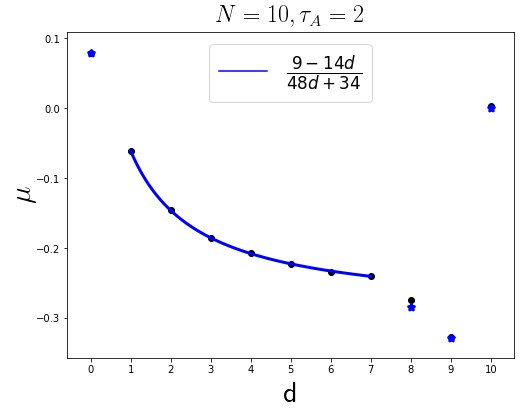

In [11]:
import matplotlib.lines as mlines

df = pd.read_csv('../csv/N=20/lin-step-ds-tau-2.csv', sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

plt.figure(figsize=(8,6))
plt.xticks(np.arange(0, 11))

plt.scatter(ds, mus, color='black')

x = np.linspace(1, 7, num=1000)
y = (9-14*x)/(48*x+34)
plt.plot(x, y, color='blue', linewidth=3)

pointMarker = '*'
plt.scatter(0, 156/1976, color='blue', linewidth=3, marker=pointMarker)
plt.scatter(8, (lambda d: (11-31*d)/(96*d + 65)) (8), color='blue', linewidth=3, marker=pointMarker)
# plt.scatter(9, (lambda d: (6*d+1)/(19 - 16*d)) (9), color='blue', linewidth=3, marker=pointMarker)
plt.scatter(9, (lambda d: (1-17*d)/(48*d + 31)) (9), color='blue', linewidth=3, marker=pointMarker)
plt.scatter(10, 0, color='blue', linewidth=3, marker=pointMarker)

blue_line = mlines.Line2D([], [], color='blue', label=r'$\frac{9-14d}{48d+34}$')
leg = plt.legend(loc='upper center', handles=[blue_line], fontsize=24)
plt.ylabel(r'$\mu$', usetex=True, fontsize=30, labelpad=0.0)
plt.xlabel('d', usetex=True, fontsize=30)
plt.title(r'$N=10, \tau_A=2$', fontsize=24, usetex=True)
plt.savefig('N=10, τ=2, pen-and-paper-calculus')

Mean squared error: 0.01
Variance score (R^2): 0.20
Line: 0.01d + -0.177772


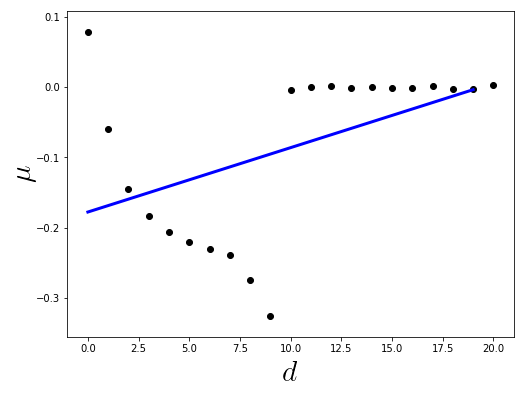

In [13]:
df = pd.read_csv(csvFilename['N-20']['ds']['tau=2'], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/N=20/d-tau1', forHalfN=True, N=100);

Mean squared error: 0.03
Variance score (R^2): 0.18
Line: 0.01d + -0.263298


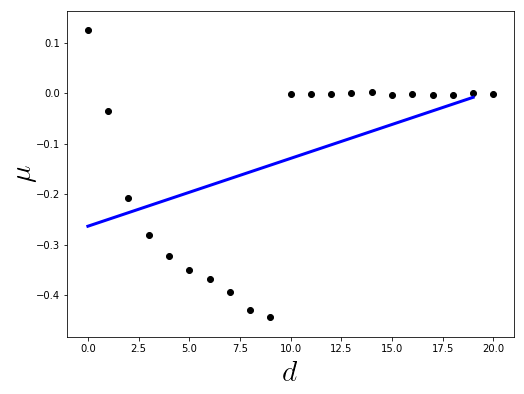

In [14]:
df = pd.read_csv(csvFilename['N=20']['ds']['tau=3'], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/N=20/d-tau1', forHalfN=True, N=100);

Mean squared error: 0.05
Variance score (R^2): 0.18
Line: 0.02d + -0.342616


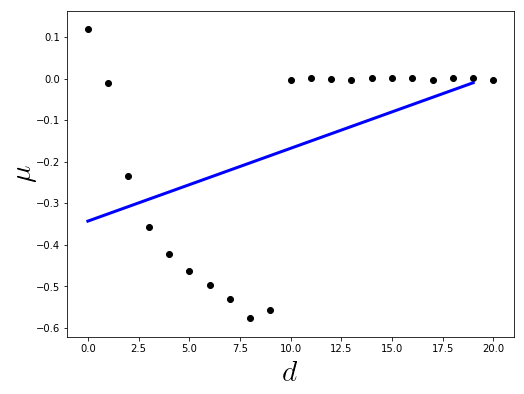

In [25]:
df = pd.read_csv(csvFilename['N=20']['ds']['tau=4'], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/N=20/d-tau1', forHalfN=True, N=100);

Mean squared error: 0.07
Variance score (R^2): 0.16
Line: 0.02d + -0.407157


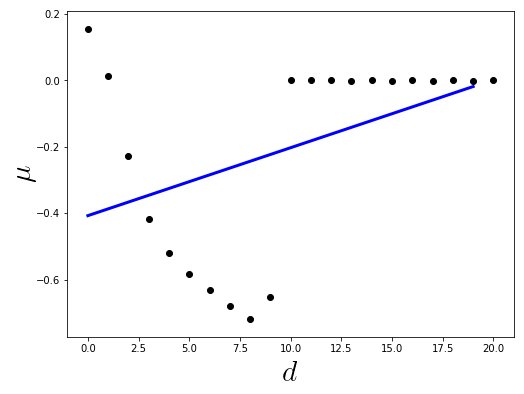

In [26]:
df = pd.read_csv(csvFilename['N=20']['ds']['tau=5'], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/N=20/d-tau1', forHalfN=True, N=100);

Mean squared error: 0.10
Variance score (R^2): 0.15
Line: 0.02d + -0.464426


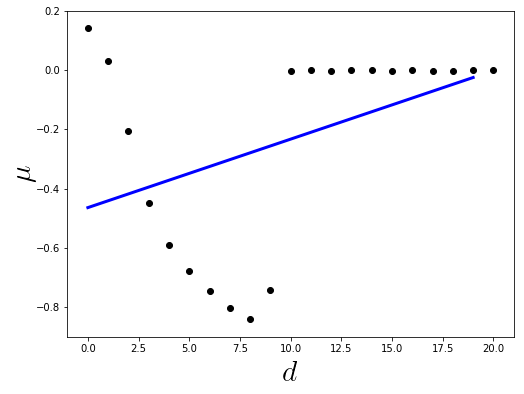

In [27]:
df = pd.read_csv(csvFilename['N=20']['ds']['tau=6'], sep=',')
toDict = df.to_dict('l')
ds = toDict['d']
mus = toDict['µ']

linearRegression(ds, mus, Dependence.D, '../../../draft/img/results/'+filePrefix+'/N=20/d-tau1', forHalfN=True, N=100);